# Лабораторная работа 2

---

## Описание работы

В данной лабораторной работе проводится анализ данных о прокате городских велосипедов в Сеуле. Набор данных включает почасовые записи о количестве аренд велосипедов, а также информацию о погоде и праздниках.

---

## Цели работы

1. **Глубокий анализ временных рядов**: агрегирование данных, поиск сезонных закономерностей, выявление выбросов.
2. **Обогащение и соединение данных**: интеграция данных о праздниках и погоде, работа с пропущенными значениями.
3. **Аналитика и пользовательские метрики**: сегментация клиентов, анализ влияния погоды, простое прогнозирование.
4. **Автоматизация**: написание функций для формирования отчётов и сводных таблиц, визуализация зависимостей.
5. **Финальная часть**: составление отчёта с ключевыми выводами и создание интерактивного дашборда.

---

## Этапы выполнения

### **1. Глубокий анализ временных рядов**

#### **1.1 Агрегация по периодам времени**
- Агрегация данных по дням, неделям и месяцам.
- Расчет суммарного и среднего числа прокатов за каждый период.
- Анализ изменений проката велосипедов.
- Построение линейного графика для помесячного тренда и столбчатой диаграммы для средних значений по дням недели.

#### **1.2 Сезонные закономерности**
- Исследование паттернов использования велосипедов в разные дни и время суток.
- Сравнение будних и выходных дней.
- Анализ суточного цикла прокатов.
- Построение графиков распределения прокатов в течение суток для будней и выходных.

#### **1.3 Выбросы и аномалии**
- Построение временного графика прокатов.
- Выявление аномальных точек.
- Определение причин выбросов (праздники, городские мероприятия, погодные условия).

---

### **2. Обогащение и соединение данных**

#### **2.1 Интеграция нескольких источников**
- Объединение данных проката с информацией о праздниках и погоде.
- Использование функций `merge` / `join` библиотеки Pandas.

#### **2.2 Работа с пропущенными данными**
- Проверка датасета на наличие пропусков.
- Обработка пропусков (заполнение или удаление).

---

### **3. Нестандартная аналитика и пользовательские метрики**

#### **3.1 Анализ поведения клиентов (сегментация)**
- Сегментация клиентов по частоте аренд.
- Анализ поведения каждой группы.

#### **3.2 Влияние внешних факторов**
- Изучение влияния погодных условий на спрос на велосипеды.
- Корреляционный анализ между погодными показателями и количеством прокатов.
- Построение диаграммы рассеяния "температура vs количество прокатов".

#### **3.3 Пользовательские метрики и прогнозирование**
- Предложение собственных метрик для оценки спроса.
- Построение простой модели прогнозирования.

---

### **4. Автоматизация работы с данными**

#### **4.1 Функции для формирования отчётов**
- Написание вспомогательных функций для формирования отчётов.

#### **4.2 Сводные таблицы и визуализация зависимостей**
- Формирование сводных таблиц с использованием `pivot_table`.
- Построение визуализаций на основе сводных таблиц.




### **1. Глубокий анализ временных рядов**

#### **1.1 Агрегация по периодам времени:**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/dataset/SeoulBikeData.csv', encoding='utf-8')


In [3]:
df

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
df.columns = df.columns.str.replace('�', '°')

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [6]:
df['Date']

,Date
0,2017-12-01
1,2017-12-01
2,2017-12-01
3,2017-12-01
4,2017-12-01
...,...
8755,2018-11-30
8756,2018-11-30
8757,2018-11-30
8758,2018-11-30


In [7]:
df["Day"]= df['Date'].dt.day
df["Month"]= df['Date'].dt.month
df["Year"]= df['Date'].dt.year
df["Weekday"]= df['Date'].dt.day_name()

In [8]:
df['WeekPeriod'] = df['Date'].dt.to_period('W').apply(lambda x: f"{x.start_time.date()}/{x.end_time.date()}")

In [9]:
print(df['WeekPeriod'])

0       2017-11-27/2017-12-03
1       2017-11-27/2017-12-03
2       2017-11-27/2017-12-03
3       2017-11-27/2017-12-03
4       2017-11-27/2017-12-03
                ...          
8755    2018-11-26/2018-12-02
8756    2018-11-26/2018-12-02
8757    2018-11-26/2018-12-02
8758    2018-11-26/2018-12-02
8759    2018-11-26/2018-12-02
Name: WeekPeriod, Length: 8760, dtype: object


In [10]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday,WeekPeriod
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday,2017-11-27/2017-12-03
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday,2017-11-27/2017-12-03
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday,2017-11-27/2017-12-03
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday,2017-11-27/2017-12-03
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday,2017-11-27/2017-12-03


In [11]:
daily_data = df.groupby('Date')['Rented Bike Count'].agg(['sum', 'mean']).reset_index()
weekly_data = df.groupby(pd.Grouper(key='Date', freq='W'))['Rented Bike Count'].agg(['sum', 'mean']).reset_index()
monthly_data = df.groupby(pd.Grouper(key='Date', freq='ME'))['Rented Bike Count'].agg(['sum', 'mean']).reset_index()

print("-" * 30)
print("Данные по дням:")
print(daily_data.head())
print("-" * 30)

print("Данные по неделям:")
print(weekly_data.head())
print("-" * 30)

print("Данные по месяцам:")
print(monthly_data.head())
print("-" * 30)

------------------------------
Данные по дням:
        Date   sum        mean
0 2017-12-01  9539  397.458333
1 2017-12-02  8523  355.125000
2 2017-12-03  7222  300.916667
3 2017-12-04  8729  363.708333
4 2017-12-05  8307  346.125000
------------------------------
Данные по неделям:
        Date    sum        mean
0 2017-12-03  25284  351.166667
1 2017-12-10  50972  303.404762
2 2017-12-17  39367  234.327381
3 2017-12-24  33078  196.892857
4 2017-12-31  36629  218.029762
------------------------------
Данные по месяцам:
        Date     sum        mean
0 2017-12-31  185330  249.099462
1 2018-01-31  150006  201.620968
2 2018-02-28  151833  225.941964
3 2018-03-31  380594  511.551075
4 2018-04-30  524227  728.093056
------------------------------


In [12]:
df['DayOfWeek'] = df['Date'].dt.dayofweek
dayofweek_data = df.groupby('DayOfWeek')['Rented Bike Count'].mean().reset_index()

days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

df['Month'] = df['Date'].dt.to_period('M')
monthly_avg_data = df.groupby('Month')['Rented Bike Count'].mean().reset_index()
monthly_avg_data['Month'] = monthly_avg_data['Month'].astype(str)
monthly_avg_data['Month'] = pd.to_datetime(monthly_avg_data['Month']).dt.strftime('%B')

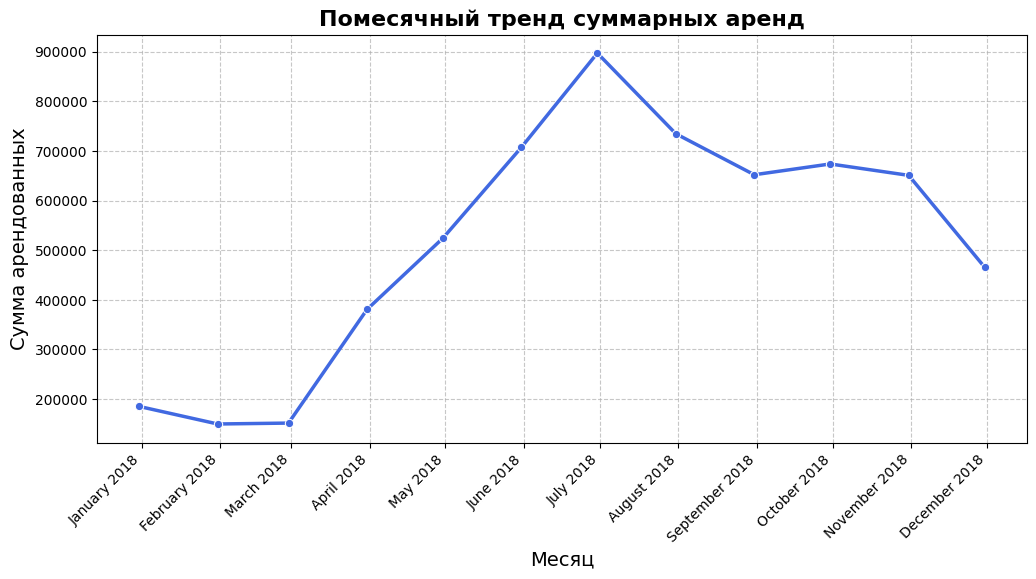

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_data['Date'], y=monthly_data['sum'], marker='o', linewidth=2.5, color='royalblue')
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Сумма арендованных', fontsize=14)
plt.title('Помесячный тренд суммарных аренд', fontsize=16, fontweight='bold')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
plt.gcf().autofmt_xdate(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

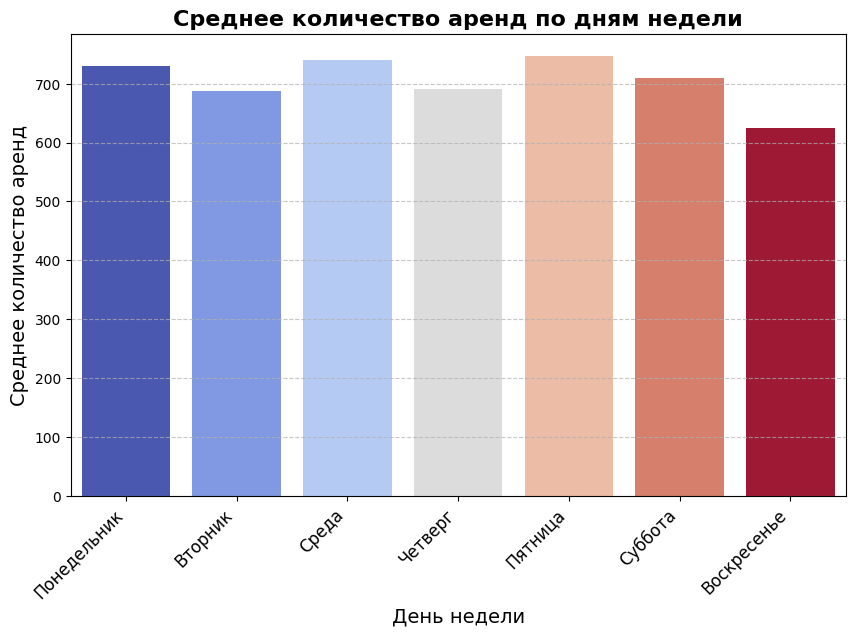

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=dayofweek_data['DayOfWeek'], y=dayofweek_data['Rented Bike Count'], palette='coolwarm', hue=dayofweek_data['DayOfWeek'], legend=False)
plt.xticks(ticks=range(7), labels=days, rotation=45, ha='right', fontsize=12)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Среднее количество аренд', fontsize=14)
plt.title('Среднее количество аренд по дням недели', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

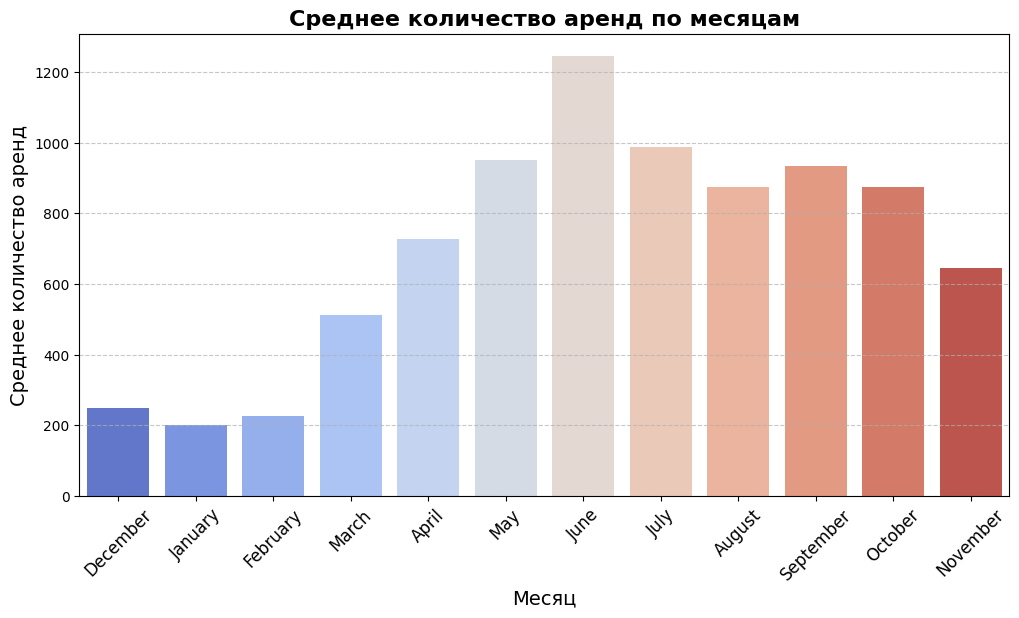

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg_data['Month'], y=monthly_avg_data['Rented Bike Count'], palette='coolwarm', hue=monthly_avg_data['Month'], legend=False)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Среднее количество аренд', fontsize=14)
plt.title('Среднее количество аренд по месяцам', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### **1.2 Сезонные закономерности**


In [16]:
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

weekday_mean = df[df['IsWeekend'] == 0]['Rented Bike Count'].mean()
weekend_mean = df[df['IsWeekend'] == 1]['Rented Bike Count'].mean()

print(f"Среднее число прокатов в будние дни: {weekday_mean:.2f}")
print(f"Среднее число прокатов в выходные дни: {weekend_mean:.2f}")
print(f"Разница: {weekday_mean - weekend_mean:.2f}")

Среднее число прокатов в будние дни: 719.45
Среднее число прокатов в выходные дни: 667.34
Разница: 52.11


In [17]:
weekdays_data = df[df['IsWeekend'] == 0]
weekends_data = df[df['IsWeekend'] == 1]

weekdays_hourly = weekdays_data.groupby('Hour')['Rented Bike Count'].mean()
weekends_hourly = weekends_data.groupby('Hour')['Rented Bike Count'].mean()

In [18]:
weekdays_hourly.head()

,Rented Bike Count
Hour,
0,497.731801
1,384.022989
2,262.938697
3,174.555556
4,117.908046


In [19]:
weekends_hourly.head()

,Rented Bike Count
Hour,
0,651.201923
1,531.990385
2,398.730769
3,275.548077
4,169.442308


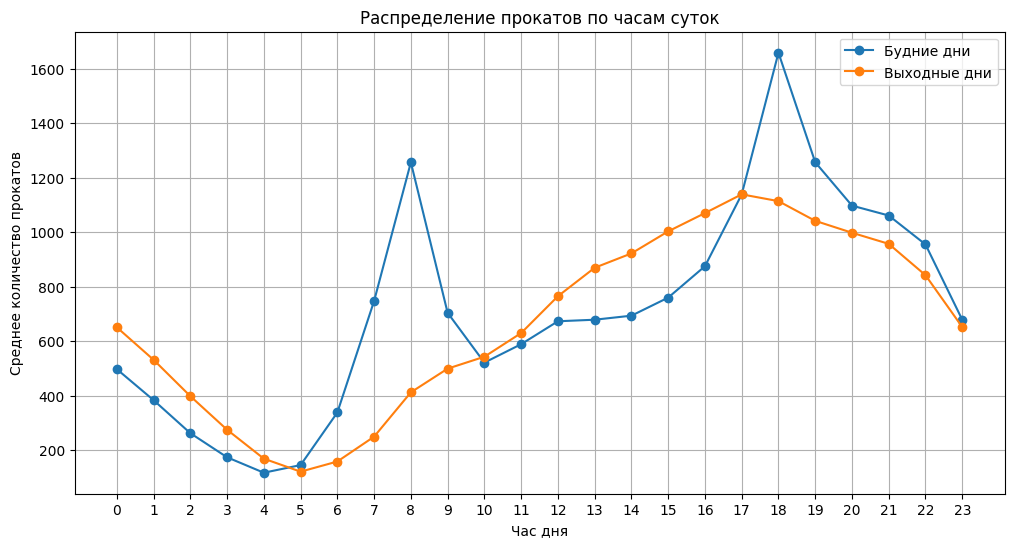

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(weekdays_hourly.index, weekdays_hourly.values, label='Будние дни', marker='o')
plt.plot(weekends_hourly.index, weekends_hourly.values, label='Выходные дни', marker='o')
plt.title('Распределение прокатов по часам суток')
plt.xlabel('Час дня')
plt.ylabel('Среднее количество прокатов')
plt.xticks(range(24))
plt.grid()
plt.legend()
plt.show()

<a id="section1"></a>
#### **1.2.1 Выводы по распределению прокатов велосипедов по часам суток**

1. **Будние дни:**
   - Наблюдаются два выраженных пика:
   - 🌞🌞🌞 **Утренний пик** c 7:00 до 9:00 – поездки на работу.🌞🌞🌞
   - 🥮🥮🥮 **Вечерний пик** с 17:00 до 19:00 – возвращение с работы.🥮🥮🥮
   - 😴😴😴 Низкое количество прокатов в ночные  часы (00:00 – 5:00).😴😴😴
   - 💼💼💼 Днём (с 10:00 до 16:00) прокаты относительно стабильны. 💼💼💼

2. **Выходные дни:**
   - Использование велосипедов более **равномерное**, без резких утренних и вечерних всплесков.
   - Наблюдается постепенный рост прокатов с утра, достигая пика в районе 13:00 – 17:00.
   - В вечернее время (после 18:00) количество прокатов плавно снижается, но без резкого падения, как в будние дни.
   - Ночная активность также ниже, но выше, чем в будние дни.

🔹 **Основное отличие** – в выходные велосипеды используются **более равномерно** в течение дня, тогда как в будни спрос подчинён рабочему графику.


#### **1.3 Выбросы и аномалии:**


In [21]:
df['DateTime'] = df['Date'] + pd.to_timedelta(df['Hour'], unit='h')

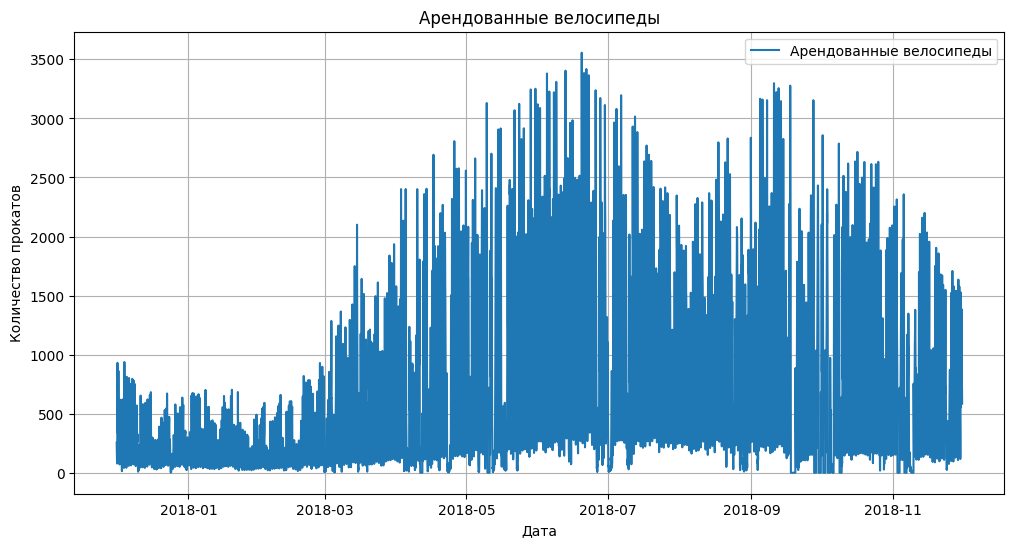

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Rented Bike Count'], label='Арендованные велосипеды')
plt.title('Арендованные велосипеды')
plt.xlabel('Дата')
plt.ylabel('Количество прокатов')
plt.legend()
plt.grid()
plt.show()

In [23]:
mean = df['Rented Bike Count'].mean()
std = df['Rented Bike Count'].std()

In [24]:
mean

704.6020547945205

In [25]:
std

644.9974677392172

In [26]:
lower_bound = abs(mean - 2 * std)
upper_bound = mean + 2 * std

print(lower_bound)
print(upper_bound)

anomalies = df[(df['Rented Bike Count'] < lower_bound) | (df['Rented Bike Count'] > upper_bound)]

print("Аномальные точки:")
print(anomalies[['DateTime', 'Rented Bike Count']])

585.3928806839139
1994.5969902729548
Аномальные точки:
                DateTime  Rented Bike Count
0    2017-12-01 00:00:00                254
1    2017-12-01 01:00:00                204
2    2017-12-01 02:00:00                173
3    2017-12-01 03:00:00                107
4    2017-12-01 04:00:00                 78
...                  ...                ...
8740 2018-11-30 04:00:00                116
8741 2018-11-30 05:00:00                149
8742 2018-11-30 06:00:00                293
8746 2018-11-30 10:00:00                554
8759 2018-11-30 23:00:00                584

[5218 rows x 2 columns]


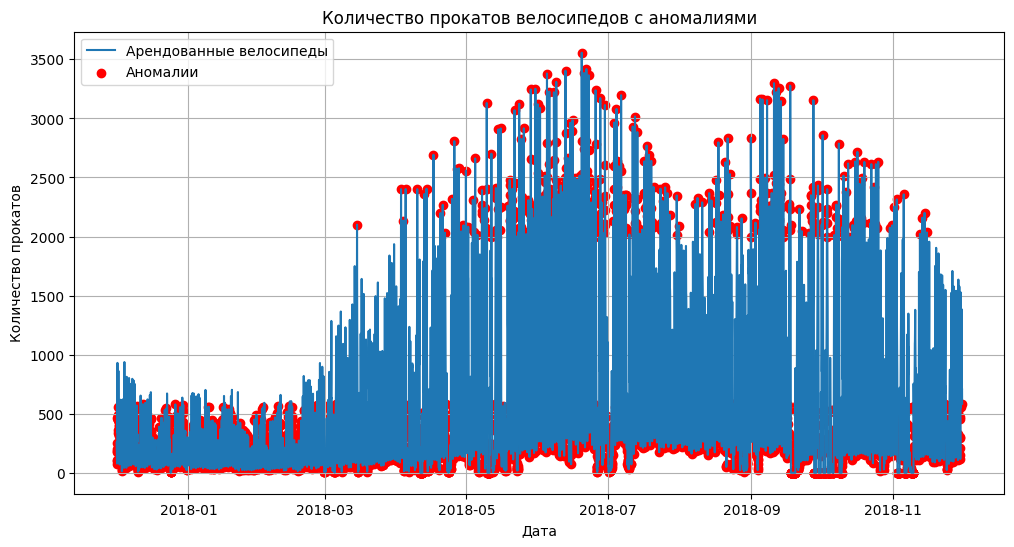

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Rented Bike Count'], label='Арендованные велосипеды')
plt.scatter(anomalies['DateTime'], anomalies['Rented Bike Count'], color='red', label='Аномалии')
plt.title('Количество прокатов велосипедов с аномалиями')
plt.xlabel('Дата')
plt.ylabel('Количество прокатов')
plt.legend()
plt.grid()
plt.show()

In [28]:
count = 0
for index, row in anomalies.iterrows():
    if count >= 5:
        break
    print(f"Дата и время: {row['DateTime']}")
    print(f"Количество прокатов: {row['Rented Bike Count']}")
    print(f"Температура: {row['Temperature(°C)']}°C")
    print(f"Погодные условия: Дождь {row['Rainfall(mm)']} мм, Снег {row['Snowfall (cm)']} см")
    print(f"Праздник: {row['Holiday']}")
    print(f"Сезон: {row['Seasons']}")
    print("-" * 40)
    count += 1

Дата и время: 2017-12-01 00:00:00
Количество прокатов: 254
Температура: -5.2°C
Погодные условия: Дождь 0.0 мм, Снег 0.0 см
Праздник: No Holiday
Сезон: Winter
----------------------------------------
Дата и время: 2017-12-01 01:00:00
Количество прокатов: 204
Температура: -5.5°C
Погодные условия: Дождь 0.0 мм, Снег 0.0 см
Праздник: No Holiday
Сезон: Winter
----------------------------------------
Дата и время: 2017-12-01 02:00:00
Количество прокатов: 173
Температура: -6.0°C
Погодные условия: Дождь 0.0 мм, Снег 0.0 см
Праздник: No Holiday
Сезон: Winter
----------------------------------------
Дата и время: 2017-12-01 03:00:00
Количество прокатов: 107
Температура: -6.2°C
Погодные условия: Дождь 0.0 мм, Снег 0.0 см
Праздник: No Holiday
Сезон: Winter
----------------------------------------
Дата и время: 2017-12-01 04:00:00
Количество прокатов: 78
Температура: -6.0°C
Погодные условия: Дождь 0.0 мм, Снег 0.0 см
Праздник: No Holiday
Сезон: Winter
----------------------------------------


In [29]:
top_anomalies = anomalies.sort_values(by='Rented Bike Count', ascending=False).head(5)

for index, row in top_anomalies.iterrows():
    print(f"Дата и время: {row['DateTime']}")
    print(f"Количество прокатов: {row['Rented Bike Count']}")
    print(f"Температура: {row['Temperature(°C)']}°C")
    print(f"Погодные условия: Дождь {row['Rainfall(mm)']} мм, Снег {row['Snowfall (cm)']} см")
    print(f"Праздник: {row['Holiday']}")
    print(f"Сезон: {row['Seasons']}")
    print("-" * 40)

Дата и время: 2018-06-19 18:00:00
Количество прокатов: 3556
Температура: 24.1°C
Погодные условия: Дождь 0.0 мм, Снег 0.0 см
Праздник: No Holiday
Сезон: Summer
----------------------------------------
Дата и время: 2018-06-21 18:00:00
Количество прокатов: 3418
Температура: 27.8°C
Погодные условия: Дождь 0.0 мм, Снег 0.0 см
Праздник: No Holiday
Сезон: Summer
----------------------------------------
Дата и время: 2018-06-12 18:00:00
Количество прокатов: 3404
Температура: 24.9°C
Погодные условия: Дождь 0.0 мм, Снег 0.0 см
Праздник: No Holiday
Сезон: Summer
----------------------------------------
Дата и время: 2018-06-20 18:00:00
Количество прокатов: 3384
Температура: 27.0°C
Погодные условия: Дождь 0.0 мм, Снег 0.0 см
Праздник: No Holiday
Сезон: Summer
----------------------------------------
Дата и время: 2018-06-04 18:00:00
Количество прокатов: 3380
Температура: 24.4°C
Погодные условия: Дождь 0.0 мм, Снег 0.0 см
Праздник: No Holiday
Сезон: Summer
----------------------------------------


### **2. Обогащение и соединение данных**

#### **2.1 Интеграция нескольких источников**


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [31]:
holidays_df = pd.read_csv("/content/drive/MyDrive/dataset/holiday_data.csv", parse_dates=["Date"])
holidays_df["IsHoliday"] = 1

In [32]:
holidays_df

,Date,Holiday,IsHoliday
0,2018-01-01,New Year's Day,1
1,2018-02-15,Seollal Holiday,1
2,2018-02-16,Seollal (Lunar New Year),1
3,2018-02-17,Seollal Holiday,1
4,2018-03-01,Independence Movement Day,1
5,2018-05-05,Children's Day,1
6,2018-05-07,Children's Day (substitute),1
7,2018-06-06,Memorial Day,1
8,2018-08-15,Liberation Day,1
9,2018-09-23,Chuseok Holiday,1


In [33]:
df = df.merge(holidays_df[["Date", "IsHoliday"]], on="Date", how="left")

#### **2.2 Работа с пропущенными данными**


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [35]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Functioning Day,Day,Month,Year,Weekday,WeekPeriod,DayOfWeek,IsWeekend,DateTime,IsHoliday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Yes,1,2017-12,2017,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 00:00:00,NaN
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Yes,1,2017-12,2017,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 01:00:00,NaN
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Yes,1,2017-12,2017,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 02:00:00,NaN
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Yes,1,2017-12,2017,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 03:00:00,NaN
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,Yes,1,2017-12,2017,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 04:00:00,NaN


In [36]:
df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


In [37]:
df.fillna(0, inplace=True)

In [38]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Functioning Day,Day,Month,Year,Weekday,WeekPeriod,DayOfWeek,IsWeekend,DateTime,IsHoliday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Yes,1,2017-12,2017,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 00:00:00,0.0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Yes,1,2017-12,2017,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 01:00:00,0.0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Yes,1,2017-12,2017,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 02:00:00,0.0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Yes,1,2017-12,2017,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 03:00:00,0.0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,Yes,1,2017-12,2017,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 04:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,...,Yes,30,2018-11,2018,Friday,2018-11-26/2018-12-02,4,0,2018-11-30 19:00:00,0.0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,...,Yes,30,2018-11,2018,Friday,2018-11-26/2018-12-02,4,0,2018-11-30 20:00:00,0.0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,...,Yes,30,2018-11,2018,Friday,2018-11-26/2018-12-02,4,0,2018-11-30 21:00:00,0.0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,...,Yes,30,2018-11,2018,Friday,2018-11-26/2018-12-02,4,0,2018-11-30 22:00:00,0.0


In [39]:
df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


In [40]:
df[df["IsHoliday"] == 1][["Date", "IsHoliday"]].sort_values("Date")

,Date,IsHoliday
744,2018-01-01,1.0
767,2018-01-01,1.0
766,2018-01-01,1.0
765,2018-01-01,1.0
764,2018-01-01,1.0
...,...,...
7489,2018-10-09,1.0
7488,2018-10-09,1.0
7510,2018-10-09,1.0
7498,2018-10-09,1.0


### **3. Нестандартная аналитика и пользовательские метрики**

#### **3.1 Анализ поведения клиентов (сегментация)**


In [41]:
users = pd.read_csv('/content/drive/MyDrive/dataset/synthetic_users.csv')

In [42]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                1000 non-null   object
 1   user_type              1000 non-null   object
 2   registration_date      1000 non-null   object
 3   preferred_hours        1000 non-null   object
 4   preferred_days         1000 non-null   object
 5   avg_rentals_per_month  1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [43]:
stations = pd.read_csv('/content/drive/MyDrive/dataset/synthetic_stations.csv')

In [44]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_id       100 non-null    object 
 1   station_name     100 non-null    object 
 2   district         100 non-null    object 
 3   latitude         100 non-null    float64
 4   longitude        100 non-null    float64
 5   location_type    100 non-null    object 
 6   capacity         100 non-null    int64  
 7   peak_hours       100 non-null    object 
 8   peak_days        100 non-null    object 
 9   usage_intensity  100 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 7.9+ KB


In [45]:
rentals = pd.read_csv('/content/drive/MyDrive/dataset/synthetic_rentals.csv')

In [46]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39705 entries, 0 to 39704
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rental_id         39705 non-null  object
 1   date              39705 non-null  object
 2   hour              39705 non-null  int64 
 3   minute            39705 non-null  int64 
 4   user_id           39705 non-null  object
 5   station_id        39705 non-null  object
 6   duration_minutes  39705 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.1+ MB


In [47]:
def segment_user(rentals_per_month):
    if rentals_per_month > 10:
        return "Frequent"
    elif 4 <= rentals_per_month <= 10:
        return "Periodic"
    else:
        return "Rare"

In [48]:
users["segment"] = users["avg_rentals_per_month"].apply(segment_user)

In [49]:
users

,user_id,user_type,registration_date,preferred_hours,preferred_days,avg_rentals_per_month,segment
0,U0001,periodic,2022-10-22,"10,11,12,13,14,15,16",weekday,4,Periodic
1,U0002,rare,2022-04-28,"7,8,9",weekday,2,Rare
2,U0003,rare,2023-09-22,"7,8,9",weekend,3,Rare
3,U0004,periodic,2023-07-22,"7,8,17,18,19",weekend,7,Periodic
4,U0005,frequent,2023-06-08,"7,8,9,12,13,17,18,19",weekday,32,Frequent
...,...,...,...,...,...,...,...
995,U0996,frequent,2022-09-08,"7,8,9,17,18,19",weekday,15,Frequent
996,U0997,rare,2024-05-24,"7,8,9",all,3,Rare
997,U0998,frequent,2022-04-05,"7,8,9,17,18,19",weekday,31,Frequent
998,U0999,rare,2023-08-31,"16,17,18,19,20",all,1,Rare


In [50]:
user_behavior = rentals.merge(users, on="user_id", how="left")
hourly_behavior = user_behavior.groupby(["segment", "hour"])["rental_id"].count().reset_index()
daily_behavior = user_behavior.groupby(["segment", "date"])["rental_id"].count().reset_index()

In [51]:
hourly_behavior.head()

,segment,hour,rental_id
0,Frequent,0,573
1,Frequent,1,554
2,Frequent,2,397
3,Frequent,3,518
4,Frequent,4,500


In [52]:
daily_behavior.head()

,segment,date,rental_id
0,Frequent,2017-01-01,456
1,Frequent,2017-01-02,567
2,Frequent,2017-01-03,471
3,Frequent,2017-01-04,601
4,Frequent,2017-01-05,651


In [53]:
station_usage = rentals.groupby("station_id")["rental_id"].count().reset_index()
station_usage.columns = ["station_id", "total_rentals"]
stations = stations.merge(station_usage, on="station_id", how="left").fillna(0)

In [54]:
stations.head()

,station_id,station_name,district,latitude,longitude,location_type,capacity,peak_hours,peak_days,usage_intensity,total_rentals
0,S001,Dongdaemun Station 6,Dongdaemun,37.667576,127.081480,mixed,23,"8,9,12,13,17,18,19",all,0.68,353
1,S002,Mapo Station 8,Mapo,37.588224,127.095523,mixed,30,"8,9,12,13,17,18,19",all,0.52,330
2,S003,Dongdaemun Station 8,Dongdaemun,37.673043,126.849501,mixed,39,"8,9,12,13,17,18,19",all,0.60,363
3,S004,Yeongdeungpo Station 6,Yeongdeungpo,37.696972,127.088342,mixed,22,"8,9,12,13,17,18,19",all,0.49,341
4,S005,Gangnam Station 10,Gangnam,37.628139,127.158919,business,49,"8,9,17,18,19",weekday,0.99,423


In [55]:
stations["usage_category"] = pd.qcut(stations["total_rentals"], q=[0, 0.2, 0.8, 1.0], labels=["Low", "Medium", "High"])

In [56]:
stations.head()

,station_id,station_name,district,latitude,longitude,location_type,capacity,peak_hours,peak_days,usage_intensity,total_rentals,usage_category
0,S001,Dongdaemun Station 6,Dongdaemun,37.667576,127.081480,mixed,23,"8,9,12,13,17,18,19",all,0.68,353,Medium
1,S002,Mapo Station 8,Mapo,37.588224,127.095523,mixed,30,"8,9,12,13,17,18,19",all,0.52,330,Low
2,S003,Dongdaemun Station 8,Dongdaemun,37.673043,126.849501,mixed,39,"8,9,12,13,17,18,19",all,0.60,363,Medium
3,S004,Yeongdeungpo Station 6,Yeongdeungpo,37.696972,127.088342,mixed,22,"8,9,12,13,17,18,19",all,0.49,341,Medium
4,S005,Gangnam Station 10,Gangnam,37.628139,127.158919,business,49,"8,9,17,18,19",weekday,0.99,423,Medium


In [57]:
rentals["is_weekend"] = pd.to_datetime(rentals["date"]).dt.weekday >= 5
time_usage = rentals.groupby(["station_id", "hour", "is_weekend"])["rental_id"].count().reset_index()

In [58]:
rentals.head()

,rental_id,date,hour,minute,user_id,station_id,duration_minutes,is_weekend
0,R000000,2017-01-01,0,45,U0010,S034,28,True
1,R000001,2017-01-01,0,17,U0824,S031,31,True
2,R000002,2017-01-01,0,38,U0954,S035,45,True
3,R000003,2017-01-01,0,41,U0047,S061,55,True
4,R000004,2017-01-01,0,25,U0908,S079,21,True


In [59]:
time_usage.head()

,station_id,hour,is_weekend,rental_id
0,S001,0,False,17
1,S001,0,True,4
2,S001,1,False,11
3,S001,1,True,1
4,S001,2,False,12


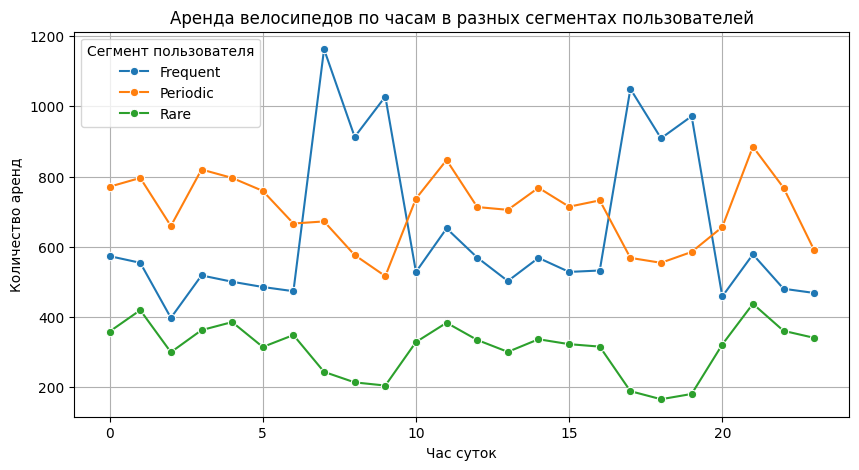

In [60]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_behavior, x="hour", y="rental_id", hue="segment", marker="o")
plt.title("Аренда велосипедов по часам в разных сегментах пользователей")
plt.xlabel("Час суток")
plt.ylabel("Количество аренд")
plt.legend(title="Сегмент пользователя")
plt.grid(True)
plt.show()

In [61]:
top_stations = rentals["station_id"].value_counts().head(int(len(rentals["station_id"].unique()) * 0.2)).index

morning_rentals = rentals[(rentals["hour"] >= 6) & (rentals["hour"] <= 10) & (rentals["station_id"].isin(top_stations))]
evening_rentals = rentals[(rentals["hour"] >= 17) & (rentals["hour"] <= 21) & (rentals["station_id"].isin(top_stations))]

morning_usage = morning_rentals.groupby("station_id")["rental_id"].count().reset_index()
evening_usage = evening_rentals.groupby("station_id")["rental_id"].count().reset_index()

morning_usage["time_period"] = "Morning"
evening_usage["time_period"] = "Evening"

station_usage = pd.concat([morning_usage, evening_usage])

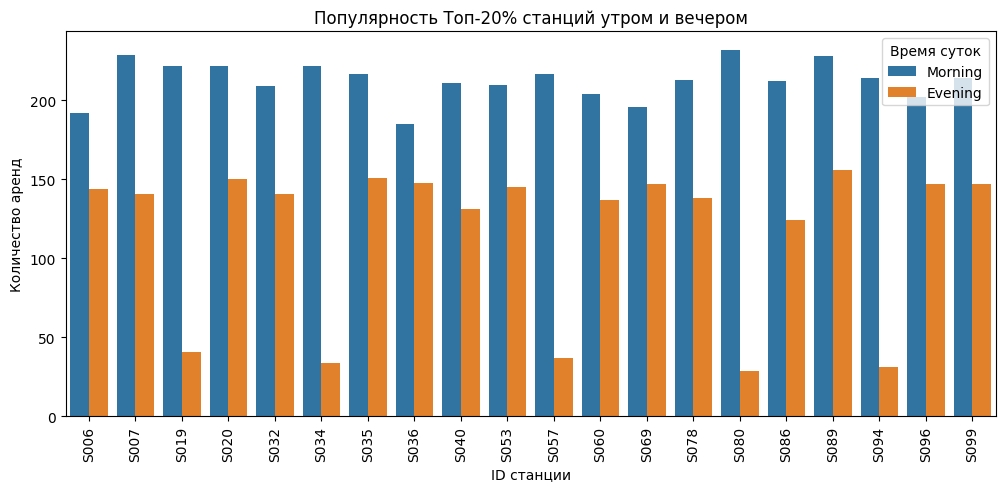

In [62]:
plt.figure(figsize=(12, 5))
sns.barplot(data=station_usage, x="station_id", y="rental_id", hue="time_period")
plt.xticks(rotation=90)
plt.title("Популярность Топ-20% станций утром и вечером")
plt.xlabel("ID станции")
plt.ylabel("Количество аренд")
plt.legend(title="Время суток")
plt.show()

In [63]:
df_merged = rentals.merge(stations, on="station_id", how="left")

In [64]:
df_merged.head()

,rental_id,date,hour,minute,user_id,station_id,duration_minutes,is_weekend,station_name,district,latitude,longitude,location_type,capacity,peak_hours,peak_days,usage_intensity,total_rentals,usage_category
0,R000000,2017-01-01,0,45,U0010,S034,28,True,Jongno Station 2,Jongno,37.548081,127.089129,business,38,"8,9,17,18,19",weekday,0.57,480,High
1,R000001,2017-01-01,0,17,U0824,S031,31,True,Seocho Station 2,Seocho,37.429762,127.110368,residential,19,"7,8,18,19,20",all,0.68,379,Medium
2,R000002,2017-01-01,0,38,U0954,S035,45,True,Seodaemun Station 5,Seodaemun,37.529528,126.872021,transit,38,"7,8,9,17,18,19,20",weekday,0.77,553,High
3,R000003,2017-01-01,0,41,U0047,S061,55,True,Mapo Station 5,Mapo,37.662058,126.992142,residential,19,"7,8,18,19,20",all,0.67,381,Medium
4,R000004,2017-01-01,0,25,U0908,S079,21,True,Gangnam Station 10,Gangnam,37.649585,126.953299,business,21,"8,9,17,18,19",weekday,0.87,445,Medium


In [65]:
rentals_by_type = df_merged.groupby("location_type")["rental_id"].count()

In [66]:
rentals_by_type

,rental_id
location_type,
business,6722
mixed,7101
recreation,5755
residential,11770
transit,8357


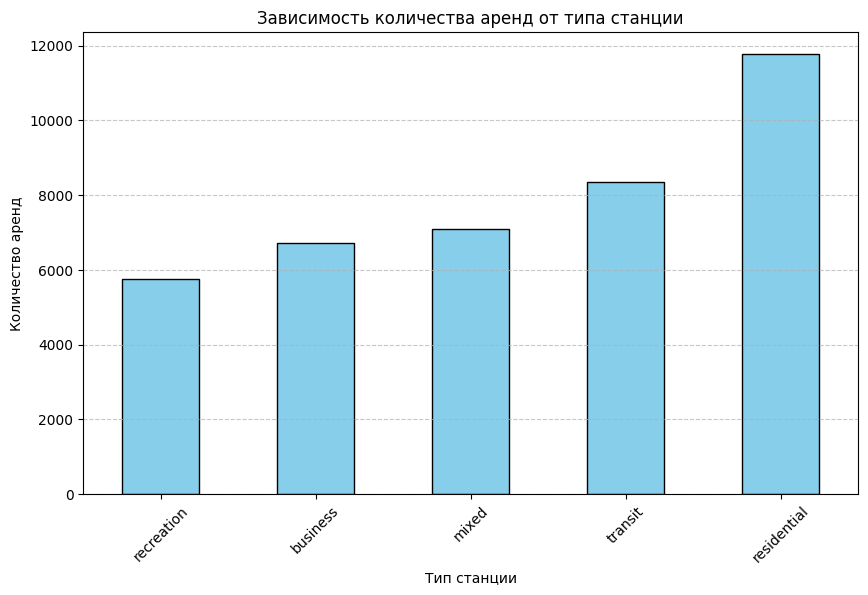

In [67]:
plt.figure(figsize=(10, 6))

rentals_by_type.sort_values().plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Тип станции")
plt.ylabel("Количество аренд")
plt.title("Зависимость количества аренд от типа станции")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### **3.2 Влияние внешних факторов**



In [68]:
weather_factors = ["Temperature(°C)", "Humidity(%)", "Rainfall(mm)", "Snowfall (cm)", "Rented Bike Count"]

In [69]:
corr_matrix = df[weather_factors].corr()

In [70]:
corr_matrix

,Temperature(°C),Humidity(%),Rainfall(mm),Snowfall (cm),Rented Bike Count
Temperature(°C),1.000000,0.159371,0.050282,-0.218405,0.538558
Humidity(%),0.159371,1.000000,0.236397,0.108183,-0.199780
Rainfall(mm),0.050282,0.236397,1.000000,0.008500,-0.123074
Snowfall (cm),-0.218405,0.108183,0.008500,1.000000,-0.141804
Rented Bike Count,0.538558,-0.199780,-0.123074,-0.141804,1.000000


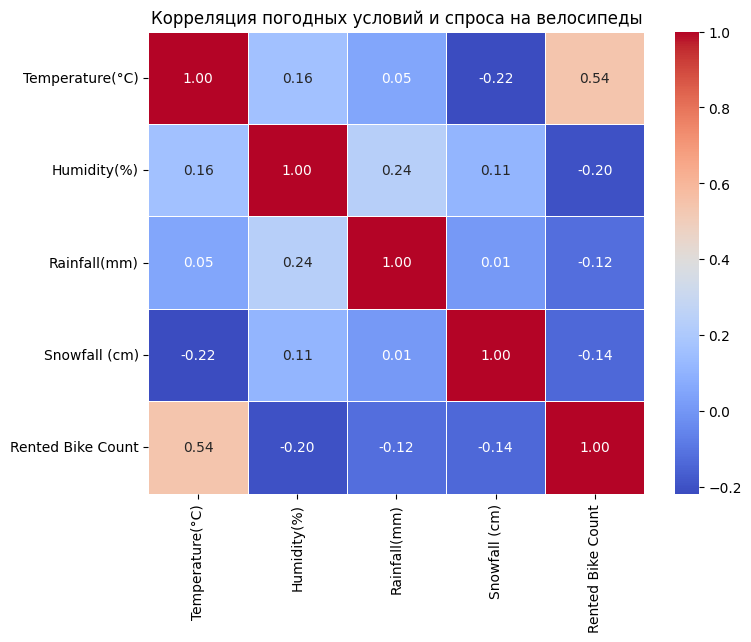

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Корреляция погодных условий и спроса на велосипеды")
plt.show()

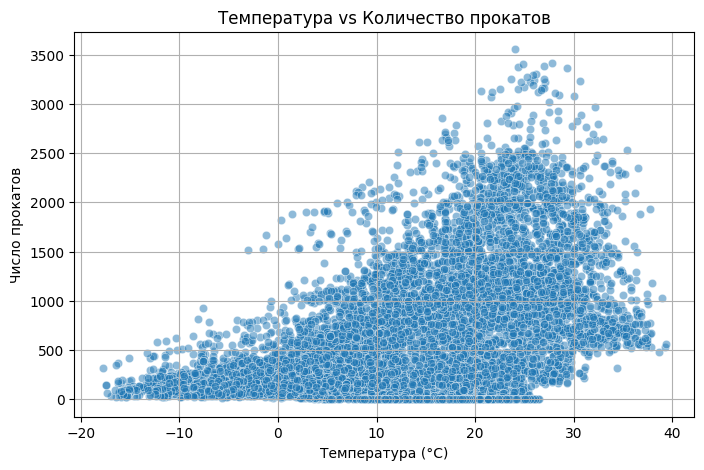

In [72]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Temperature(°C)", y="Rented Bike Count", alpha=0.5)
plt.title("Температура vs Количество прокатов")
plt.xlabel("Температура (°C)")
plt.ylabel("Число прокатов")
plt.grid(True)
plt.show()

In [73]:
df["Rainy"] = df["Rainfall(mm)"].apply(lambda x: "Rainy" if x > 0 else "Dry")

In [74]:
rainy_stats = df.groupby("Rainy")["Rented Bike Count"].mean()

In [75]:
rainy_stats.head()

,Rented Bike Count
Rainy,
Dry,739.311103
Rainy,163.456439


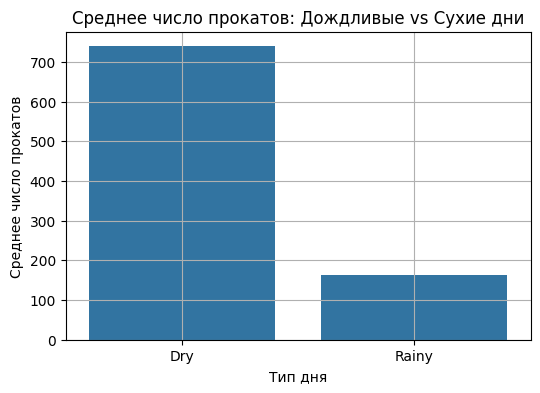

In [76]:
plt.figure(figsize=(6, 4))
sns.barplot(x=rainy_stats.index, y=rainy_stats.values)
plt.title("Среднее число прокатов: Дождливые vs Сухие дни")
plt.xlabel("Тип дня")
plt.ylabel("Среднее число прокатов")
plt.grid(True)
plt.show()

In [77]:
def temp_category(temp):
    if temp <= 5:
        return "Cold"
    elif temp <= 30:
        return "Moderate"
    else:
        return "Hot"

In [78]:
df["TempCategory"] = df["Temperature(°C)"].apply(temp_category)

In [79]:
temp_stats = df.groupby("TempCategory")["Rented Bike Count"].mean()

In [80]:
temp_stats.head()

,Rented Bike Count
TempCategory,
Cold,254.782367
Hot,1106.400391
Moderate,866.369110


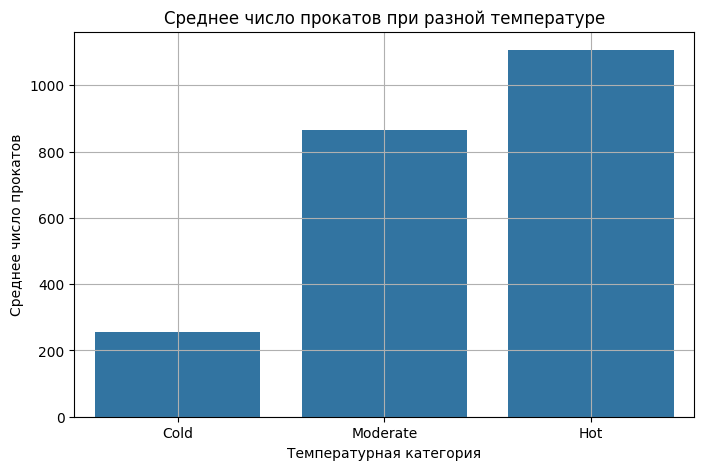

In [81]:
plt.figure(figsize=(8, 5))
sns.barplot(x=temp_stats.index, y=temp_stats.values, order=["Cold", "Moderate", "Hot"])
plt.title("Среднее число прокатов при разной температуре")
plt.xlabel("Температурная категория")
plt.ylabel("Среднее число прокатов")
plt.grid(True)
plt.show()

<a id="weather"></a>
#### **3.2.1 Выводы о влиянии факторов на число прокатов велосипедов**

1. 🌡🌡🌡 **Температура – основной фактор спроса:**
   - Корреляционная матрица показывает, что температура коррелирует положительно с числом прокатов .
   - При **повышении температуры спрос растёт**, максимальное количество прокатов при  **20-30°C**.
   - **Низкие температуры**: при температуре **ниже 0°C** спрос на аренду велосипедов значительно падает.

2. 🌧🌧🌧 **Влияние осадков (дождь, снег):**
   - Количество аренды велосипедов **сильно уменьшается в дождливые дни**
   - Дождь снижает количество аренд, в то время как снег их уменьшает =D


3. 🌡🌡🌡 **Температурные категории:**
   - Количество аренд намного больше в **'Moderate (5-30°C) и 'Hot (30+°C)' дни**.
   - В холодную погоду (особенно при **< 0°C**) спрос на прокаты **резко падает**.

- 📈**Наибольшее влияние** на спрос оказывают **температура** и **наличие осадков**.
- 📈**Оптимальные условия** для аренды: **тепло (15-30°C), отсутствие дождя**.
- 📉**Неблагоприятные условия**: **мороз (< 0°C),  дождь**, при которых спрос на аренду  резко снижается.

#### **3.3 Пользовательские метрики и прогнозирование**



In [82]:
df['TempScore'] = df['Temperature(°C)'].apply(lambda x: max(0, min(1, (x - 10) / 15)))

Text(0.5, 1.0, 'Зависимость спроса от индекса комфортности')

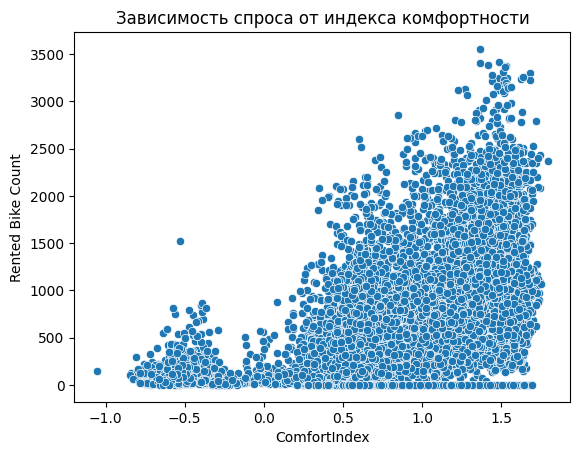

In [83]:
df['ComfortIndex'] = df['TempScore'] + (df['Rainfall(mm)'] + df['Snowfall (cm)'] == 0).astype(int) - df['Humidity(%)']/200 - df['Wind speed (m/s)']/10
sns.scatterplot(x='ComfortIndex', y='Rented Bike Count', data=df)
plt.title('Зависимость спроса от индекса комфортности')

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [85]:
features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
            'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)']

In [86]:
X = df[features]
y = df['Rented Bike Count']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

In [87]:
print(f"R²: {r2_score(y, y_pred):.2f}, MAE: {mean_absolute_error(y, y_pred):.1f}")

R²: 0.40, MAE: 370.6


In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X, y)
y_pred_rf = model_rf.predict(X)
mae_rf = mean_absolute_error(y, y_pred_rf)
r2_rf = r2_score(y, y_pred_rf)
print(f"R²: {r2_rf:.2f}, MAE: {mae_rf:.1f}")

R²: 0.95, MAE: 98.3


In [90]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_rf.feature_importances_
}).sort_values('Importance', ascending=False)

In [91]:
feature_importance

,Feature,Importance
0,Temperature(°C),0.392496
1,Humidity(%),0.198569
5,Solar Radiation (MJ/m2),0.125491
4,Dew point temperature(°C),0.098253
2,Wind speed (m/s),0.096686
3,Visibility (10m),0.071482
6,Rainfall(mm),0.017024


In [92]:
mask = (df['Temperature(°C)'] > 20) & (df['Rainfall(mm)'] == 0)
mean_rentals = df[mask]['Rented Bike Count'].mean()

In [93]:
print(f"Ожидаемое количество прокатов: {mean_rentals:.0f}")

Ожидаемое количество прокатов: 1191


In [94]:
pred = df.loc[mask, 'Rented Bike Count'].mean()
y_pred_heuristic = np.full(len(df), pred)
mae_heuristic = mean_absolute_error(y, y_pred_heuristic)
r2_heuristic = r2_score(y, y_pred_heuristic)

In [95]:
print(f"R²: {r2_heuristic:.2f}, MAE: {mae_heuristic:.1f}")

R²: -0.57, MAE: 716.1


In [96]:
august_1_data = df[(df['Date'].dt.year == 2018) & (df['Date'].dt.month == 8) & (df['Date'].dt.day == 1)]

In [97]:
august_1_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Weekday,WeekPeriod,DayOfWeek,IsWeekend,DateTime,IsHoliday,Rainy,TempCategory,TempScore,ComfortIndex
5832,2018-08-01,875,0,30.5,68,1.9,2000,23.9,0.0,0.0,...,Wednesday,2018-07-30/2018-08-05,2,0,2018-08-01 00:00:00,0.0,Dry,Hot,1.0,1.470
5833,2018-08-01,724,1,29.9,70,1.0,2000,23.8,0.0,0.0,...,Wednesday,2018-07-30/2018-08-05,2,0,2018-08-01 01:00:00,0.0,Dry,Moderate,1.0,1.550
5834,2018-08-01,501,2,29.5,69,0.8,2000,23.2,0.0,0.0,...,Wednesday,2018-07-30/2018-08-05,2,0,2018-08-01 02:00:00,0.0,Dry,Moderate,1.0,1.575
5835,2018-08-01,362,3,29.1,64,0.5,1997,21.5,0.0,0.0,...,Wednesday,2018-07-30/2018-08-05,2,0,2018-08-01 03:00:00,0.0,Dry,Moderate,1.0,1.630
5836,2018-08-01,250,4,28.5,69,0.3,2000,22.2,0.0,0.0,...,Wednesday,2018-07-30/2018-08-05,2,0,2018-08-01 04:00:00,0.0,Dry,Moderate,1.0,1.625


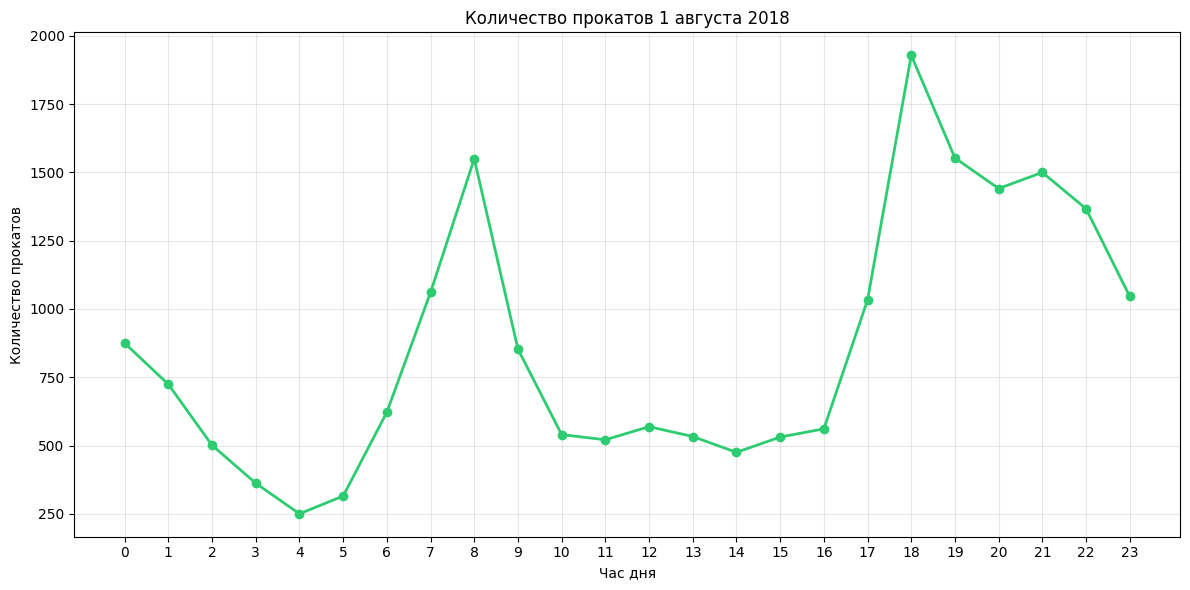

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(august_1_data['Hour'],
         august_1_data['Rented Bike Count'],
         marker='o',
         linestyle='-',
         color='#2ecc71',
         linewidth=2)

plt.title('Количество прокатов 1 августа 2018')
plt.xlabel('Час дня')
plt.ylabel('Количество прокатов')
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [99]:
stats = {
    "Среднее количество прокатов": august_1_data['Rented Bike Count'].mean(),
    "Максимальное количество": august_1_data['Rented Bike Count'].max(),
    "Минимальное количество": august_1_data['Rented Bike Count'].min(),
    "Средняя температура": august_1_data['Temperature(°C)'].mean(),
    "Осадки (сумма)": august_1_data['Rainfall(mm)'].sum()
}

In [100]:
stats

{'Среднее количество прокатов': 863.0,
 'Максимальное количество': 1929,
 'Минимальное количество': 250,
 'Средняя температура': 33.42916666666667,
 'Осадки (сумма)': 0.0}

In [101]:
X_aug1 = august_1_data[features]
y_aug1 = august_1_data['Rented Bike Count']

model = LinearRegression()
model.fit(X_aug1, y_aug1)

august_1_data_copy = august_1_data.copy()
august_1_data_copy['LR_Prediction'] = model.predict(X_aug1)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_aug1, y_aug1)

august_1_data_copy['RF_Prediction'] = model_rf.predict(X_aug1)

mean_rentals_good_weather = mean_rentals

print(august_1_data_copy[['LR_Prediction', 'RF_Prediction']].head())

      LR_Prediction  RF_Prediction
5832    1028.500939         816.91
5833     649.585871         734.92
5834     639.414151         583.04
5835     665.953614         445.34
5836     455.514838         297.91


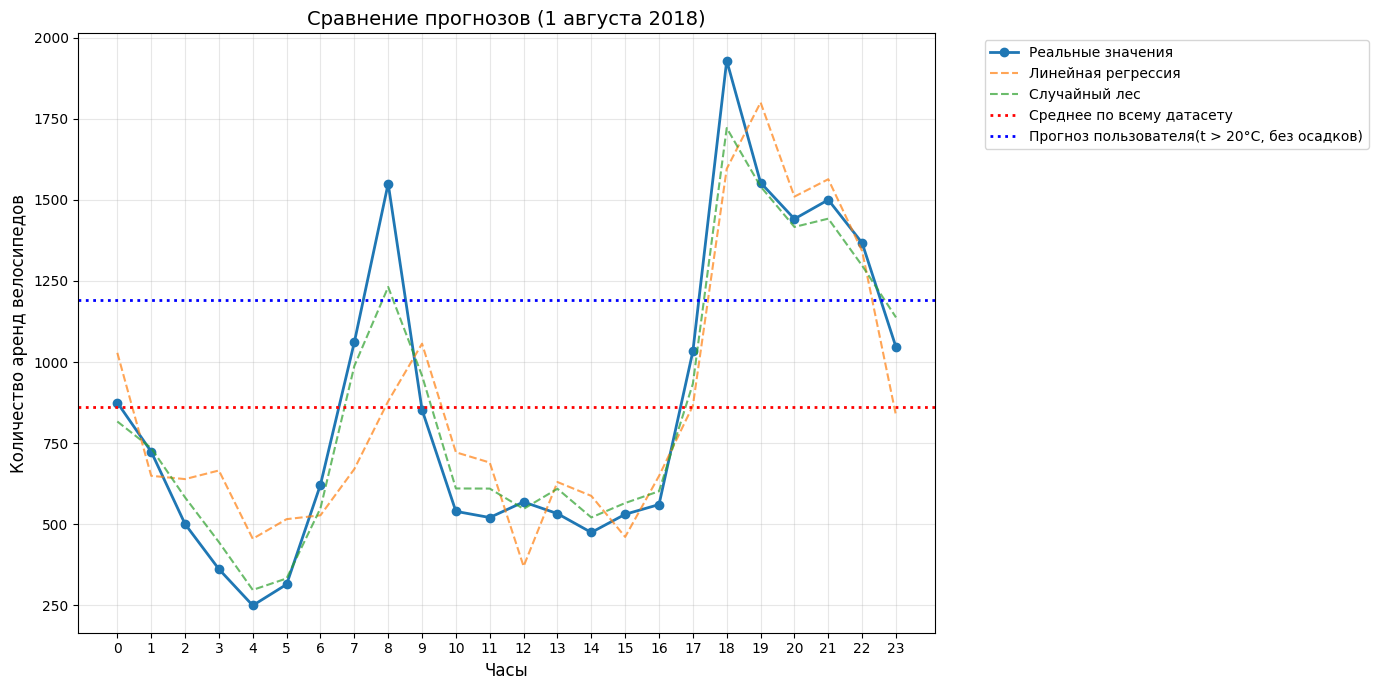

In [102]:
plt.figure(figsize=(14, 7))

plt.plot(august_1_data_copy['Hour'],
         august_1_data_copy['Rented Bike Count'],
         label='Реальные значения',
         marker='o',
         linewidth=2)

plt.plot(august_1_data_copy['Hour'],
         august_1_data_copy['LR_Prediction'],
         '--',
         label='Линейная регрессия',
         alpha=0.7)

plt.plot(august_1_data_copy['Hour'],
         august_1_data_copy['RF_Prediction'],
         '--',
         label='Случайный лес',
         alpha=0.7)

mean_rentals_all = august_1_data_copy['Rented Bike Count'].mean()
plt.axhline(mean_rentals_all,
            color='red',
            linestyle=':',
            label='Среднее по всему датасету',
            linewidth=2)

plt.axhline(mean_rentals_good_weather,
            color='blue',
            linestyle=':',
            label='Прогноз пользователя(t > 20°C, без осадков)',
            linewidth=2)

plt.title('Сравнение прогнозов (1 августа 2018)', fontsize=14)
plt.xlabel('Часы', fontsize=12)
plt.ylabel('Количество аренд велосипедов', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 3.3.1 Анализ прогнозов и метрик

# Анализ прогнозов и метрик

## 📈 Оценка прогнозов

1. **Линейная регрессия**  
   - R² = 0.40 → модель объясняет только 40% вариации данных.  
   - MAE = 370.6 → средняя ошибка значительна, особенно в пиковые часы.  
   - Модель не справляется с нелинейностями, сглаживает пики и занижает высокие значения.  

2. **Случайный лес**  
   - R² = 0.95 → отличное качество предсказаний, модель хорошо объясняет зависимость.  
   - MAE = 98.3 → низкая средняя ошибка, что делает модель наиболее точной.  
   - Захватывает сложные зависимости и дает адекватные прогнозы в пиковые часы.  

3. **Пользовательский прогноз (t > 20°C, без осадков)**  
   - R² = -0.57 → модель хуже, чем просто среднее значение.  
   - MAE = 716.1 → очень высокая ошибка, значит, прогнозы сильно отклоняются от реальных значений.  
   - Не учитывает часовые колебания и другие факторы, влияющие на спрос.  

## 📊 Сравнение метрик

| Модель               | R²   | MAE  |
|---------------------|------|------|
| Линейная регрессия  | 0.40 | 370.6 |
| Случайный лес       | 0.95 | 98.3  |
| Пользовательский    | -0.57 | 716.1 |

## 🔍 Выводы
✅**Случайный лес значительно лучше остальных моделей**, так как объясняет 95% данных и имеет минимальную ошибку.  
⚠️**Линейная регрессия недостаточно точна, так как не учитывает нелинейные зависимости.**  
❌**Пользовательский прогноз оказался хуже случайного предположения, так как не учитывает часовые изменения.**  
✅✅✅ Для точных предсказаний стоит использовать случайный лес или другие сложные модели, такие как градиентный бустинг.

## 📊 Влияние индекса комфортности на спрос

- **Чем выше индекс, тем выше спрос на велосипеды**.
- **При значении индекса ниже 0** аренда минимальна.
- **При индексе выше 1.0** наблюдается значительный рост аренд.
- **Осадки и сильный ветер** резко снижают комфортность и спрос на аренду.

### 📌 Выводы
📈 Индекс комфортности хорошо отражает влияние погодных условий.  

### **4. Автоматизация работы с данными**

#### **4.1 Функции для формирования отчётов**



In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [104]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Weekday,WeekPeriod,DayOfWeek,IsWeekend,DateTime,IsHoliday,Rainy,TempCategory,TempScore,ComfortIndex
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 00:00:00,0.0,Dry,Cold,0.0,0.595
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 01:00:00,0.0,Dry,Cold,0.0,0.730
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 02:00:00,0.0,Dry,Cold,0.0,0.705
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 03:00:00,0.0,Dry,Cold,0.0,0.710
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 04:00:00,0.0,Dry,Cold,0.0,0.590


In [105]:
def generate_report(data, period, value):
    if period == 'day':
        filtered_data = data[(data['Date'] == value)]
        title = f'Отчет за день {value}'
    elif period == 'week':
        filtered_data = data[data['WeekPeriod'] == value]
        title = f'Отчет за неделю {value}'
    elif period == 'month':
        filtered_data = data[data['Month'] == value]
        title = f'Отчет за месяц {value}'
    else:
        raise ValueError("Недопустимый период: используйте 'day', 'week' или 'month'")

    summary = filtered_data['Rented Bike Count'].agg(['sum', 'mean', 'min', 'max'])
    print("Сводка прокатов:\n", summary)

    plt.figure(figsize=(10, 5))
    if period == 'week':
        avg_weekly = filtered_data.groupby('Weekday')['Rented Bike Count'].mean()
        avg_weekly.plot(kind='bar')
        plt.xlabel('День недели')
    elif period == 'month':
        avg_monthly = filtered_data.groupby('Day')['Rented Bike Count'].mean()
        avg_monthly.plot(kind='bar')
        plt.xlabel('День месяца')
    else:
        plt.plot(filtered_data['Hour'], filtered_data['Rented Bike Count'], marker='o', linestyle='-')
        plt.xlabel('Время')

    plt.ylabel('Среднее количество аренд велосипедов')
    plt.title(title)
    plt.grid()
    plt.show()

Сводка прокатов:
 sum     20712.0
mean      863.0
min       250.0
max      1929.0
Name: Rented Bike Count, dtype: float64


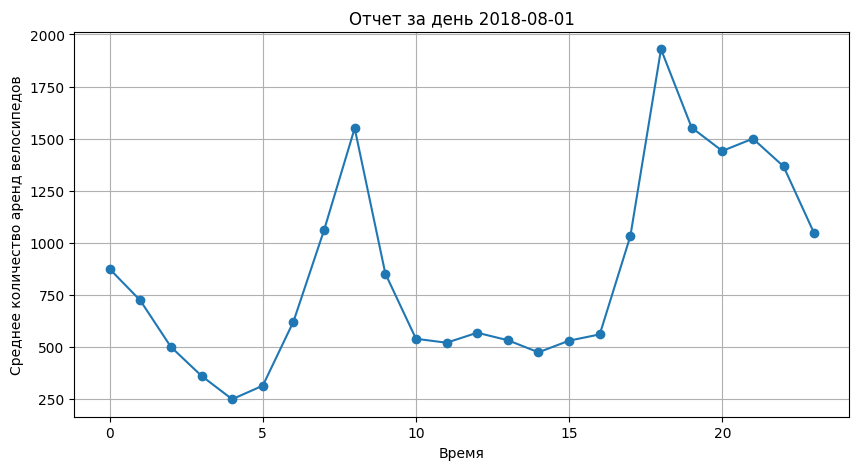

In [106]:
generate_report(df, 'day', '2018-08-01')

Сводка прокатов:
 sum     187831.000000
mean      1118.041667
min         23.000000
max       3166.000000
Name: Rented Bike Count, dtype: float64


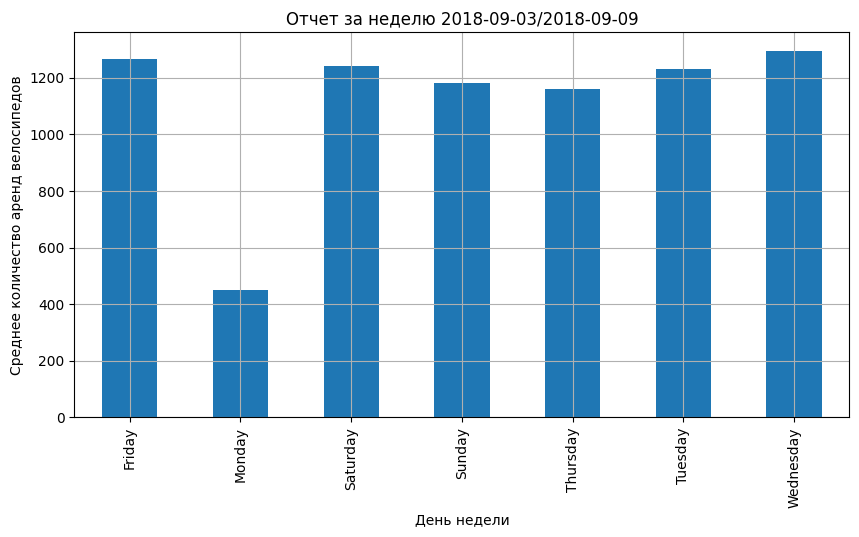

In [107]:
generate_report(df, 'week', '2018-09-03/2018-09-09')

Отчет по летним месяцам:
Сводка прокатов:
 sum     896887.000000
mean      1245.676389
min          9.000000
max       3556.000000
Name: Rented Bike Count, dtype: float64


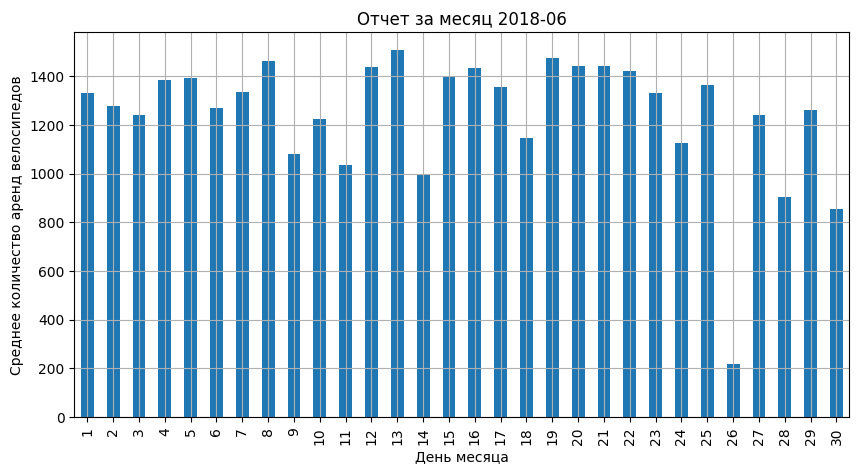

Сводка прокатов:
 sum     734460.000000
mean       987.177419
min          9.000000
max       3196.000000
Name: Rented Bike Count, dtype: float64


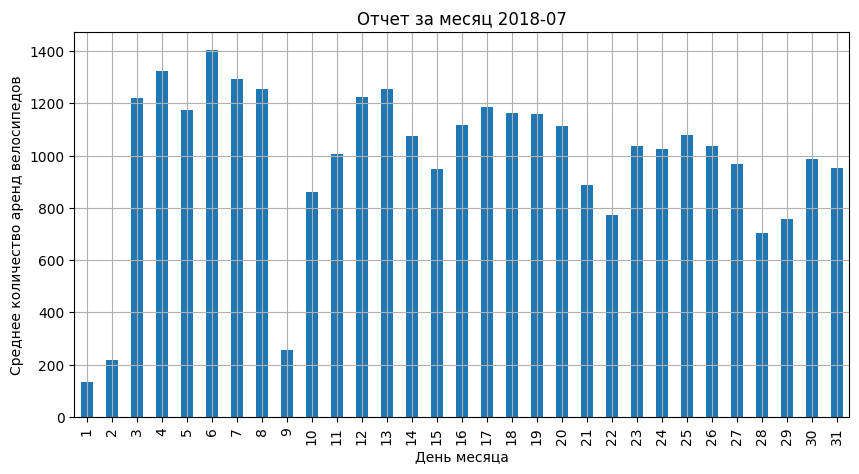

Сводка прокатов:
 sum     651887.000000
mean       876.192204
min         10.000000
max       2836.000000
Name: Rented Bike Count, dtype: float64


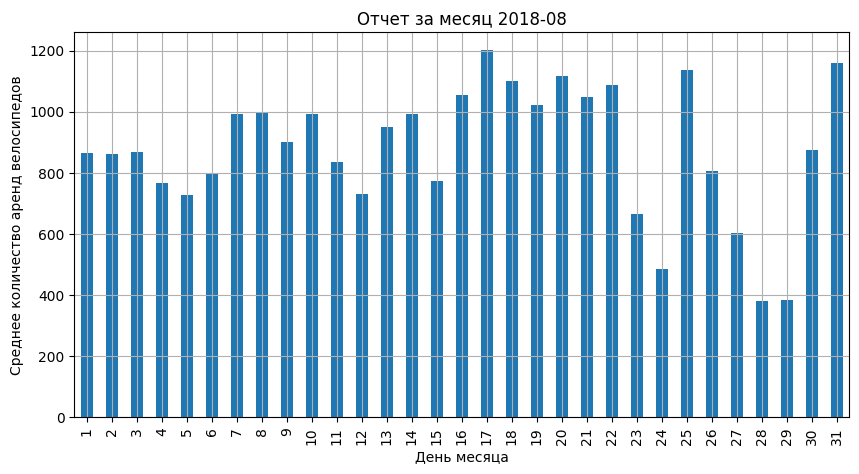

In [108]:
print("Отчет по летним месяцам:")
generate_report(df, 'month', '2018-06')
generate_report(df, 'month', '2018-07')
generate_report(df, 'month', '2018-08')

Отчет по зимним месяцам:
Сводка прокатов:
 sum     185330.000000
mean       249.099462
min          3.000000
max        937.000000
Name: Rented Bike Count, dtype: float64


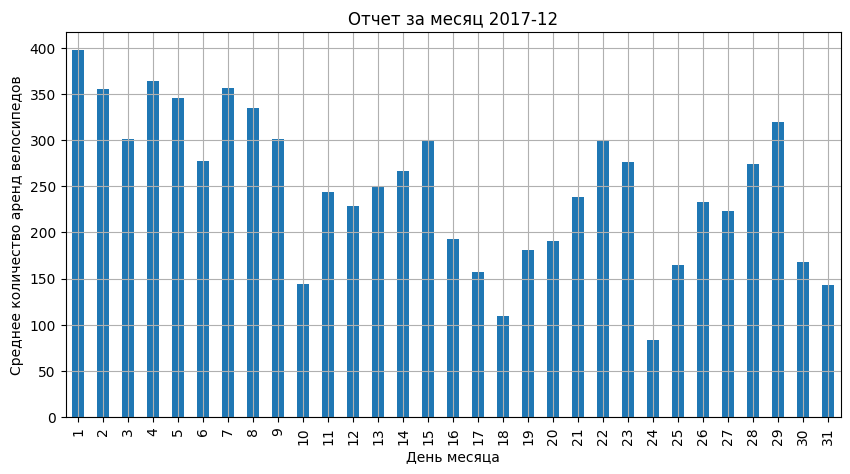

Сводка прокатов:
 sum     150006.000000
mean       201.620968
min         18.000000
max        702.000000
Name: Rented Bike Count, dtype: float64


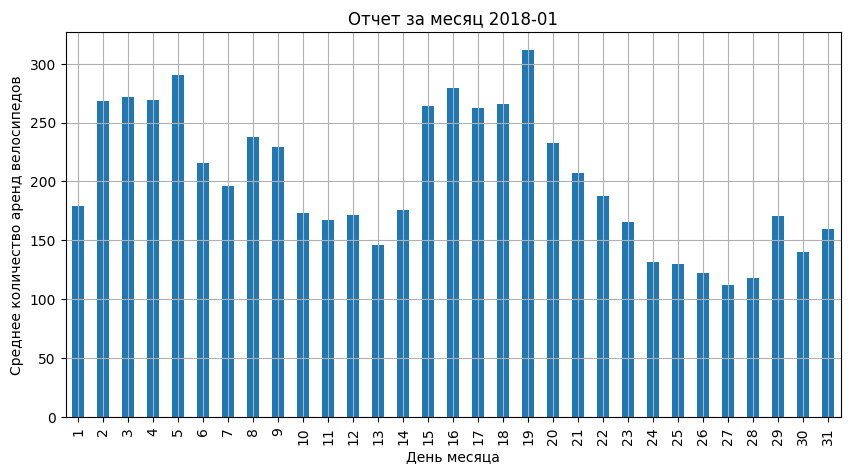

Сводка прокатов:
 sum     151833.000000
mean       225.941964
min          7.000000
max        929.000000
Name: Rented Bike Count, dtype: float64


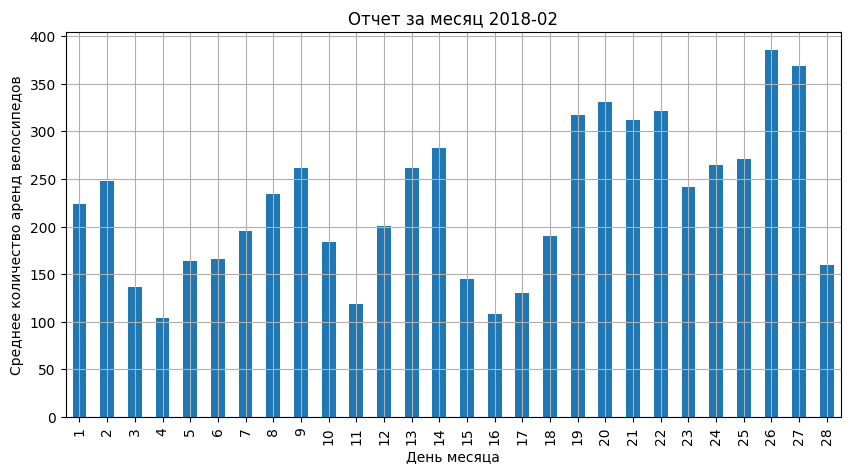

In [109]:
print("Отчет по зимним месяцам:")
generate_report(df, 'month', '2017-12')
generate_report(df, 'month', '2018-01')
generate_report(df, 'month', '2018-02')

In [110]:
def average_rentals_by_conditions(data, temp_category, rainy, temp_range=None):
    filtered_data = data[
        (data['TempCategory'] == temp_category) &
        (data['Rainy'] == rainy)
    ]
    if temp_range:
        filtered_data = filtered_data[(filtered_data['Temperature(°C)'] >= temp_range[0]) &
                                      (filtered_data['Temperature(°C)'] <= temp_range[1])]

    mean_rentals = filtered_data['Rented Bike Count'].mean()

    plt.figure(figsize=(10, 5))
    plt.hist(filtered_data['Rented Bike Count'], bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel('Количество прокатов')
    plt.ylabel('')
    plt.yticks([])

    title = f'Распределение прокатов: {temp_category}, {rainy}'
    if temp_range:
        title += f' ({temp_range[0]}°C - {temp_range[1]}°C)'
    plt.title(title, fontsize=14, fontweight='bold')

    plt.grid()
    plt.show()

    return mean_rentals

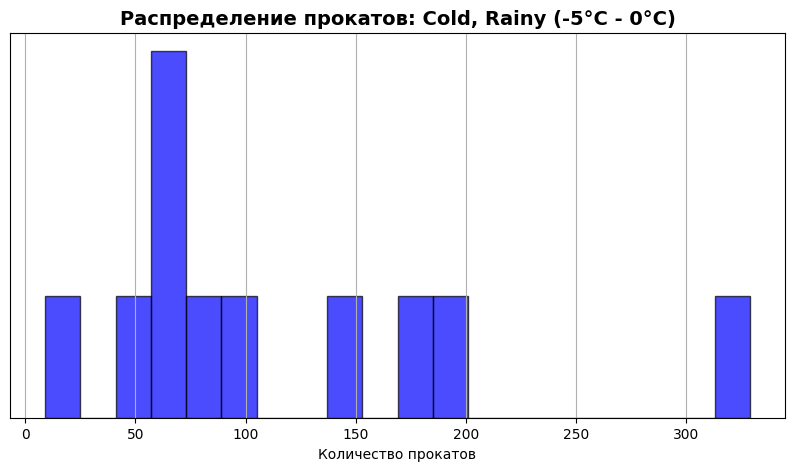

Среднее кол-во аренд в холодную дождливую погоду: 115.0909090909091


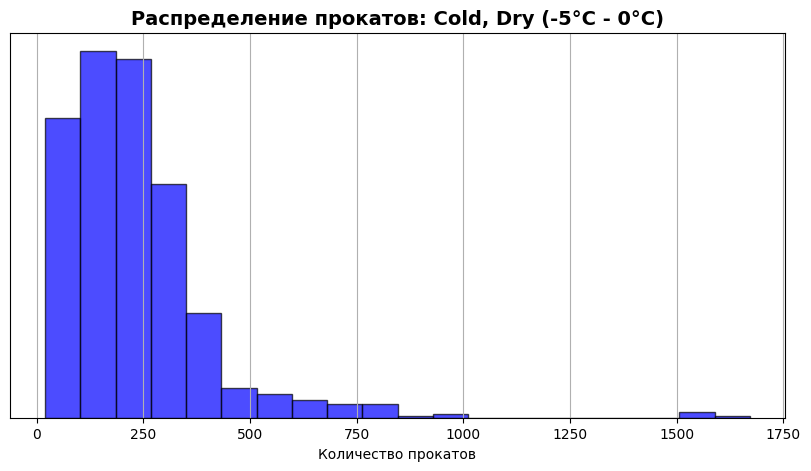

Среднее кол-во аренд в холодную сухую погоду: 231.9557046979866


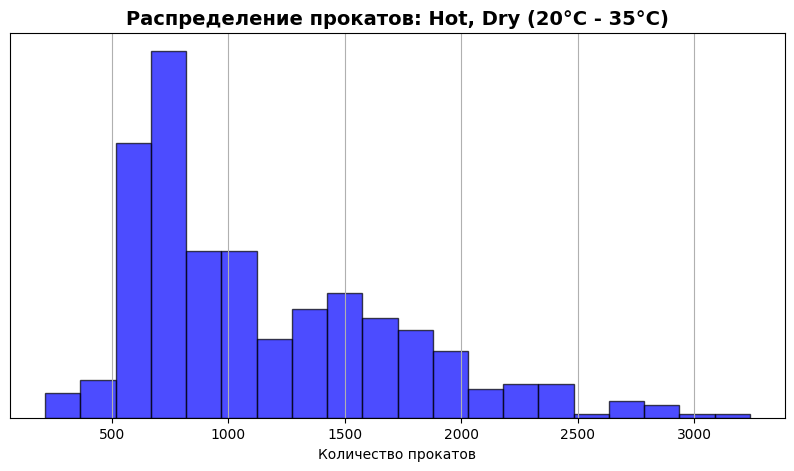

Среднее кол-во аренд в теплую сухую погоду: 1150.0645933014355


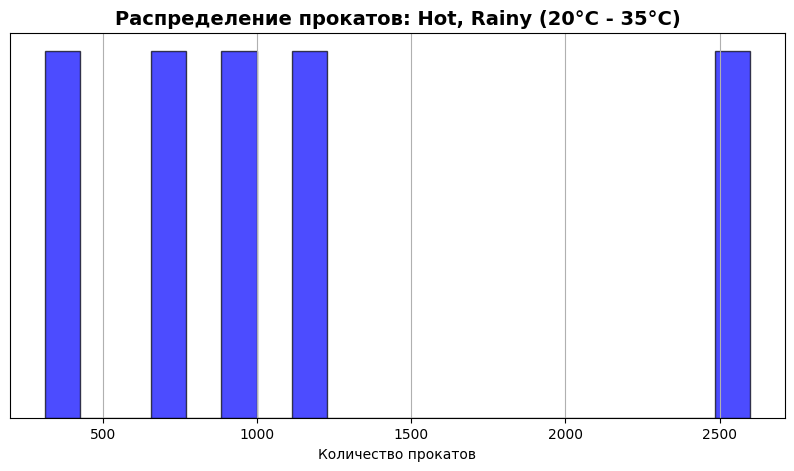

Среднее кол-во аренд в теплую дождливую погоду: 1138.8


In [111]:
print("Среднее кол-во аренд в холодную дождливую погоду:", average_rentals_by_conditions(df, 'Cold', 'Rainy', (-5, 0)))
print("Среднее кол-во аренд в холодную сухую погоду:", average_rentals_by_conditions(df, 'Cold', 'Dry', (-5, 0)))
print("Среднее кол-во аренд в теплую сухую погоду:", average_rentals_by_conditions(df, 'Hot', 'Dry', (20, 35)))
print("Среднее кол-во аренд в теплую дождливую погоду:", average_rentals_by_conditions(df, 'Hot', 'Rainy', (20, 35)))

#### **4.2 Сводные таблицы и визуализация зависимостей**


In [112]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Weekday,WeekPeriod,DayOfWeek,IsWeekend,DateTime,IsHoliday,Rainy,TempCategory,TempScore,ComfortIndex
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 00:00:00,0.0,Dry,Cold,0.0,0.595
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 01:00:00,0.0,Dry,Cold,0.0,0.730
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 02:00:00,0.0,Dry,Cold,0.0,0.705
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 03:00:00,0.0,Dry,Cold,0.0,0.710
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,Friday,2017-11-27/2017-12-03,4,0,2017-12-01 04:00:00,0.0,Dry,Cold,0.0,0.590


In [113]:
pivot1 = pd.pivot_table(df, values='Rented Bike Count', index='Month', columns='Weekday', aggfunc='mean')

In [114]:
pivot1

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
2017-12,330.133333,220.447917,258.658333,165.733333,284.114583,247.312500,235.489583
2018-01,223.760417,207.716667,176.583333,174.375000,207.979167,216.600000,199.575000
2018-02,214.708333,266.625000,179.052083,170.822917,231.104167,282.000000,237.281250
2018-03,580.183333,458.208333,584.450000,386.489583,421.058333,564.489583,573.218750
2018-04,866.812500,752.533333,702.947917,553.850000,715.885417,834.260417,707.812500
2018-05,1025.656250,1231.135417,911.041667,1013.427083,708.416667,998.933333,840.041667
2018-06,1374.158333,1232.625000,1194.933333,1235.604167,1167.583333,1130.385417,1365.010417
2018-07,1184.770833,723.658333,990.135417,773.783333,1149.427083,1049.175000,1143.020833
2018-08,941.016667,867.291667,959.083333,820.520833,871.525000,852.781250,820.108333


In [115]:
df['TimeOfDay'] = pd.cut(df['Hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

In [116]:
pivot2 = pd.pivot_table(df, values='Rented Bike Count', index='TempCategory', columns='TimeOfDay', aggfunc='mean')

<ipython-input-116-0739d49da119>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot2 = pd.pivot_table(df, values='Rented Bike Count', index='TempCategory', columns='TimeOfDay', aggfunc='mean')


In [117]:
pivot2

TimeOfDay,Night,Morning,Afternoon,Evening
TempCategory,,,,
Cold,127.561644,322.560393,275.028261,312.087662
Hot,575.388889,690.686747,909.963100,1801.378571
Moderate,369.753814,758.167742,1017.597670,1317.148536


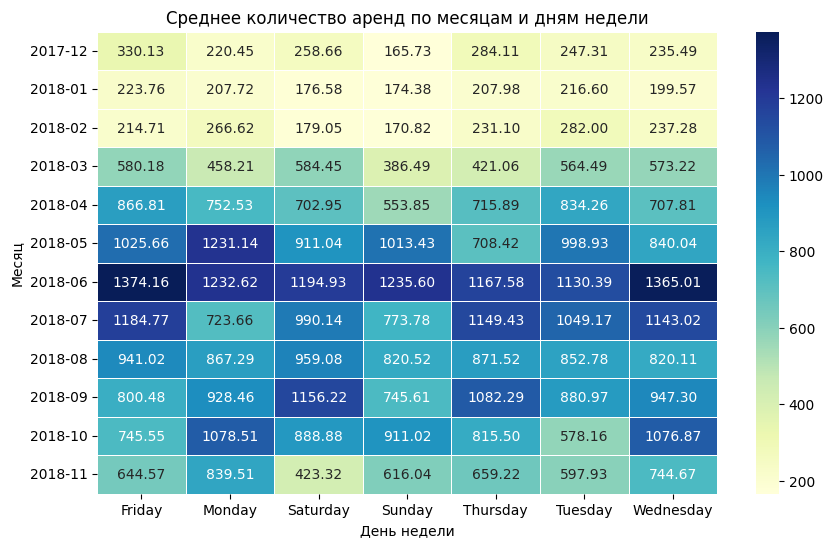

In [118]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot1, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5)
plt.title("Среднее количество аренд по месяцам и дням недели")
plt.xlabel("День недели")
plt.ylabel("Месяц")
plt.show()

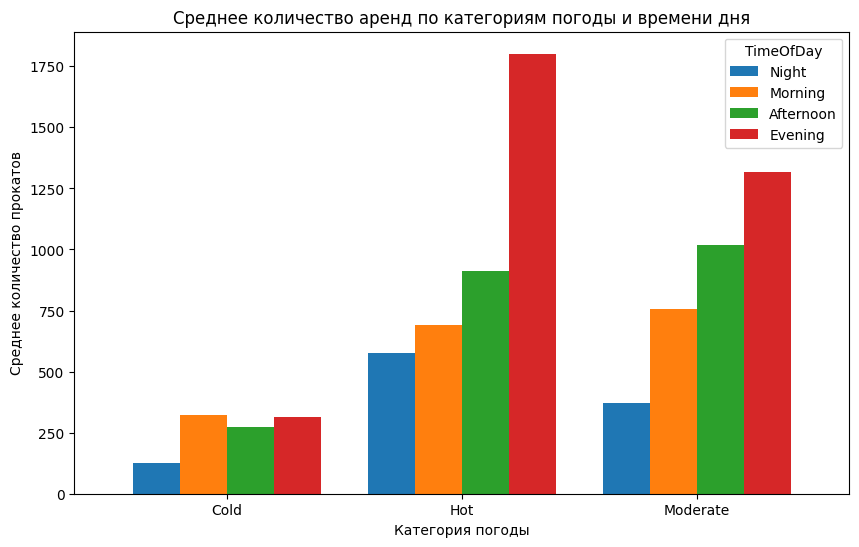

In [119]:
pivot2.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title("Среднее количество аренд по категориям погоды и времени дня")
plt.xlabel("Категория погоды")
plt.ylabel("Среднее количество прокатов")
plt.xticks(rotation=0)
plt.show()

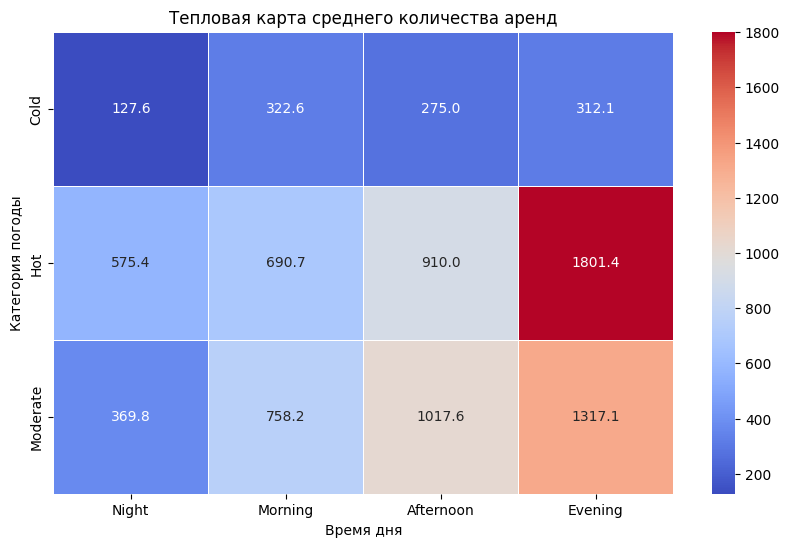

In [120]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot2, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Тепловая карта среднего количества аренд")
plt.xlabel("Время дня")
plt.ylabel("Категория погоды")
plt.show()

In [121]:
!pip install ipywidgets

In [122]:
from google.colab import output
output.enable_custom_widget_manager()

In [123]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output

### **5. Финальная часть задания**

#### **5.1 Отчёт с выводами**
#🚴 **Анализ данных по прокату велосипедов**

##📂 **Описание данных**

Датасет содержит информацию о прокате велосипедов в зависимости от различных факторов:

* Дата и время (год, месяц, день, час)

* Метеорологические условия (температура, влажность, осадки, скорость ветра, видимость, солнечная радиация)

* Календарные факторы (выходные и праздничные дни, время года, работает ли прокат велосипедов)

* Количество прокатов (Rented Bike Count)

## 🔖 **Основные тенденции**

* Общий уровень спроса растет в теплые месяцы и падает зимой.

* Максимальный уровень прокатов наблюдается в июле, минимальный — в феврале.

* По дням недели прокаты примерно равномерны, но в выходные спрос немного ниже

## 🌏 **Сезонность**

* [Описаны здесь](#section1) (Чет ссылочка не хочет работать) 😞😞😞

## 🔴 **Выбросы в данных**

## Метод обнаружения выбросов

Для выявления аномальных точек был использован метод, основанный на стандартном отклонении:

```python
lower_bound = abs(mean - 2 * std)
upper_bound = mean + 2 * std
anomalies = df[(df['Rented Bike Count'] < lower_bound) | (df['Rented Bike Count'] > upper_bound)]
```

Анализ показал, что аномальные точки присутствуют почти на всех данных Например, некоторые аномально низкие значения наблюдаются в ночные часы зимой, когда спрос на прокат минимален. Аномально высокие значения могут быть связаны с массовыми мероприятиями, праздничными днями или резкими изменениями погодных условий.

## Примеры аномальных точек

| Дата и время | Количество прокатов | Температура | Погодные условия |
|-------------|--------------------|-------------|------------------|
| 2018-11-24 00:00:00 | 499 | 2.4°C | Дождь 0.0 мм, Снег 0.0 см |
| 2018-11-24 06:00:00 | 79 | 3.7°C | Дождь 0.0 мм, Снег 1.3 см |
| 2018-11-24 09:00:00 | 24 | 0.3°C | Дождь 9.1 мм, Снег 7.1 см |
| 2018-11-24 18:00:00 | 426 | 2.6°C | Дождь 0.0 мм, Снег 3.5 см |

## Возможные причины выбросов

- Метеоусловия (дождь/снег/жаркая погода).
- Праздники или массовые мероприятия

## 🌧 **Влияние погоды**
 * [Погода есть здесь](#weather) (Чет ссылочка не хочет работать x2) 😞😞😞

## 🔊 **Сегментация пользователей**

Анализ пользователей показал три основных сегмента:
- **Frequent (Частые пользователи)** — используют велосипеды ежедневно, особенно в рабочие часы.
- **Periodic (Периодические пользователи)** — арендуют велосипеды в разное время, чаще по выходным.
- **Rare (Редкие пользователи)** — нерегулярные поездки, небольшое количество аренд.

### Популярность станций

- Утром спрос выше на станциях рядом с жилыми районами и транспортными узлами.
- Вечером наблюдается рост спроса у станций возле деловых и развлекательных центров.

### Типы станций

Количество аренд зависит от типа станции:
- **Жилые районы** (residential) — максимальное число аренд.
- **Транзитные узлы** (transit) — высокий спрос в рабочие часы.
- **Деловые районы** (business) — активны в будни.
- **Зоны отдыха** (recreation) — популярны в выходные.
---------------

- **Частые пользователи** арендуют велосипеды для поездки на/с работы
- **Спрос на станции** зависит от времени суток и местоположения.
- **Жилые районы** генерируют наибольшее количество аренд, особенно утром.
- **Зоны отдыха** популярны в выходные, но в будни их использование ограничено.

## 📗 Выводы

- **Основные пользователи** — жители города, использующие велосипеды для работы и досуга.  
- **Пиковые часы** — утро (7:00–9:00) и вечер (17:00–19:00), особенно в будние дни.  
- **Сезонность** — наибольшее количество аренд летом, минимум зимой.  
- **Факторы спроса**:  
  - **Температура** — чем теплее, тем выше спрос.  
  - **Осадки** — дождь и снег снижают число аренд.  
  - **День недели** — в будни спрос выше утром и вечером, в выходные — более равномерный.  
  - **Тип станции** — жилые районы и транспортные узлы наиболее востребованы.  
- **Выбросы** в данных связаны с погодой, праздниками и массовыми мероприятиями.  


#### **5.2 Интерактивный дашборд**


#### 🛠 **5.2.1 Инструкция к нтерактивному дашборду**
## 🛠 Как пользоваться:

1. **Выберите начальную и конечную дату**  
   - Используйте виджеты для выбора диапазона дат (начальная и конечная даты).
   - По умолчанию установлены минимальная и максимальная даты из датасета.

2. **Автоматическое обновление графиков**  
   - После изменения диапазона дат автоматически перестраиваются два графика:
     - 📈 **График прокатов по дням** – показывает количество прокатов велосипедов в выбранном диапазоне.
     - 🌡 **График зависимости прокатов от температуры** – отображает, как температура влияет на спрос (с трендовой линией).

---

## 🔍 Описание работы:

- Виджеты `DatePicker` позволяют пользователю выбрать начальную и конечную даты.
- Данные фильтруются по выбранному диапазону.
- График прокатов (`update_time_series`) обновляется при изменении даты.
- График зависимости от температуры (`update_temperature_graph`) также обновляется при изменении даты.
- Обновление выполняется через `observe()`, привязанное к изменению значений виджетов.
- Результаты отображаются в `output_time_series` и `output_temperature_graph`.

---

In [124]:
start_date = widgets.DatePicker(value=df["Date"].min(), description="Начальная дата")
end_date = widgets.DatePicker(value=df["Date"].max(), description="Конечная дата")

output_time_series = widgets.Output()
output_temperature_graph = widgets.Output()

def update_time_series(*args):
    with output_time_series:
        clear_output(wait=True)
        start = pd.to_datetime(start_date.value)
        end = pd.to_datetime(end_date.value)
        filtered_df = df[(df["Date"] >= start) & (df["Date"] <= end)]

        fig1 = px.line(filtered_df, x="Date", y="Rented Bike Count",
                       title="Прокаты велосипедов по дням")
        display(fig1)

def update_temperature_graph(*args):
    with output_temperature_graph:
        clear_output(wait=True)
        start = pd.to_datetime(start_date.value)
        end = pd.to_datetime(end_date.value)
        filtered_df = df[(df["Date"] >= start) & (df["Date"] <= end)]

        fig2 = px.scatter(filtered_df, x="Temperature(°C)", y="Rented Bike Count",
                          title="Зависимость прокатов от температуры", trendline="ols")
        display(fig2)

start_date.observe(update_time_series, names='value')
end_date.observe(update_time_series, names='value')
start_date.observe(update_temperature_graph, names='value')
end_date.observe(update_temperature_graph, names='value')

display(start_date, end_date)
display(output_time_series)
display(output_temperature_graph)

update_time_series()
update_temperature_graph()

DatePicker(value=Timestamp('2017-12-01 00:00:00'), description='Начальная дата')

DatePicker(value=Timestamp('2018-11-30 00:00:00'), description='Конечная дата')

Output()

Output()